# Исследование рынка компьютерных игр

## Описание проекта

 Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
Перед вами данные до 2016 года включительно. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
 
  
 1. Получим данные и изучим общую информацию
 
 2. Подготовка данных
 
 3. Исследовательский анализ данных
 
     3.1  Актуальность информации за прошлые годы, сроки жизни платформ
     
     3.2  Популярность актуальных платформ
     
     3.3  Оценка влияния отзывов критиков и пользователей на продажи
     
     3.4  Популярность и влияние жанров на продажи
     
   
 4. Портрет пользователя по регионам
 
     4.1  Самые популярные платформы по регионам
   
     4.2  Жанровые предпочтения в разных регионах

     4.3  Влияние рейтинга ESRB на продажи в отдельных регионах
     

 5. Сравнение пользовательских рейтингов

     5.1  Сравнение пользовательских рейтингов платформ XBox One и PC

     5.2  Средние пользовательские рейтинги жанров Action и Sports

## Получим данные и изучим общую информацию

In [51]:
import pandas as pd
import numpy as np

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    games = pd.read_csv('C:/ya_pr/games/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
    


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных

In [5]:
#Приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [6]:
#Типы данных приведем к более подходящим для работы
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('float')

games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')

Устраним строки с незаполненным годом выпуска (такие данные бесполезны для анализа):

In [7]:
games = games.dropna(subset=['year_of_release'])
games.reset_index(drop=True, inplace=True)

Суммарные продажи:

In [8]:
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [9]:
display(games.dtypes)

games.isna().mean()

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
sum_sales          float64
dtype: object

name               0.000122
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.546212
rating             0.406056
sum_sales          0.000000
dtype: float64

In [10]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Обе строки относятся к очень старым данным и содержат мало данных - удаляем. (Таким образом избавляемся от всех пропусков в данных столбцов "name" и "genre".

In [11]:
games = games.dropna(subset=['name'])
games.reset_index(drop=True,inplace=True)

Мы не имеем возможности заполнить пропуски данных в столбцах rating, user_score, critic_score, т.к. пропуски составляют более половины всех данных, т.е. любая попытка запонить эти значения некми средними (даже с учетом платформ, жанров, годов выпуска) приведет к значительному искажению данных.(Кроме того rating - качественная, неусредняемая характеристика.)
 
По этой же причине (эти данные пропущены в более чем половине строк) мы не можем их удалить - мы потеряем слишком много ценной информации. На исследование популярности платформ, выручки и тенденций эти пропуски не повлияют, а при исследовании влияния самих этих рейтингов мы не будем учитывать строки с такими пропусками.

## Исследовательский анализ данных

### Актуальность информации за прошлые годы, сроки жизни платформ

In [12]:
games.groupby(['year_of_release'])['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

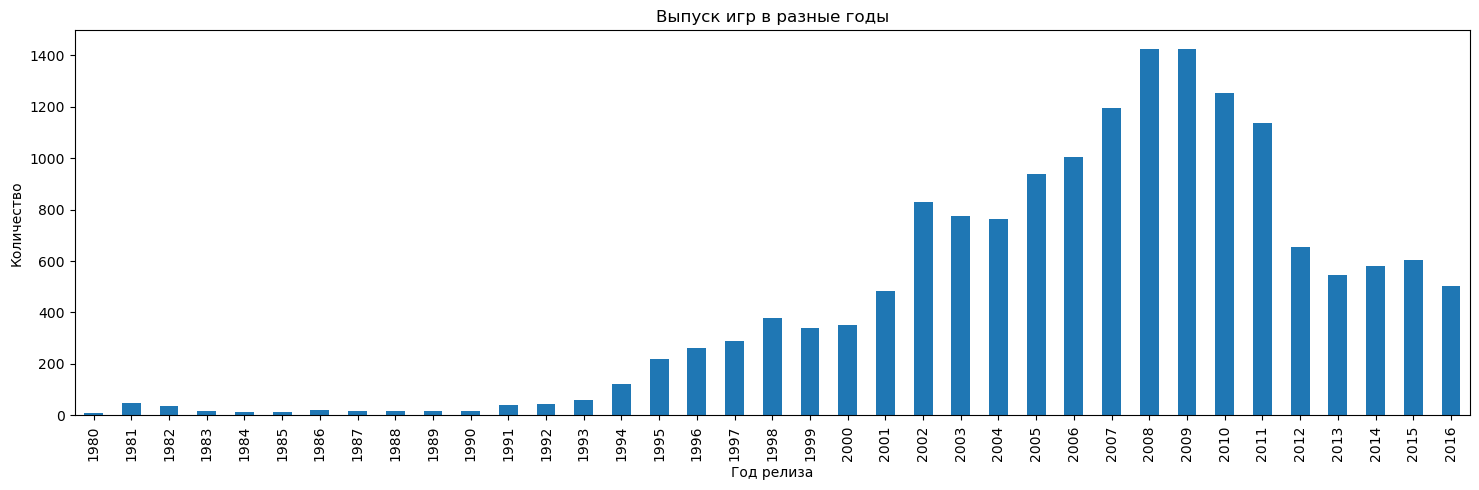

In [14]:
games.groupby(['year_of_release'])['name'].count().to_frame().plot(
    kind='bar',figsize=(18,5),legend=False,
    title='Выпуск игр в разные годы').set(xlabel='Год релиза', ylabel='Количество');

   Мы видим, что данных до 1995 года очень мало - рынок компьютерных игр только начинал развиваться. Данными до 1995 года можно пренебречь сразу, без дополнительных исследований. 
   
   Так же мы видим, что в 2001-2002 годах было значительное увеличение активности производителей игр (в 2002 количество новых игр выросло почти в 2 раза по сравнению с 2001 годом).
  
  Для окончательного решения о том данные за какие годы мы будем использовать - посмотрим на то, какие платформы были актуальны в разные годы:

In [15]:
games.groupby(['platform']).agg(
    count=('year_of_release','count'),
    min_year=('year_of_release','min'),
    max_year=('year_of_release','max')).sort_values('max_year')

,count,min_year,max_year
platform,,,
2600,116,1980,1989
GG,1,1992,1992
SCD,6,1993,1994
GEN,27,1990,1994
NES,98,1983,1994
3DO,3,1994,1995
TG16,2,1995,1995
NG,12,1993,1996
PCFX,1,1996,1996


  Мы видим, что из всех игровых платформ в 2016 году актуальными остались только 9. Соответственно для прогноза на 2017 год имеет смысл рассматривать только эти платформы.
   
  Рассмотрим продажи по годам тех платформ, деятельность которых остановилась к 2016 - что бы увидеть весь жизненный цикл одной платформы (возьмем самые популярные):  

In [16]:
platforms = games.pivot_table(
            index=['platform','year_of_release'],\
            values=['sum_sales'],\
            aggfunc=['sum']\
).reset_index()
platforms.columns=['platform','year_of_release','sum_sales']

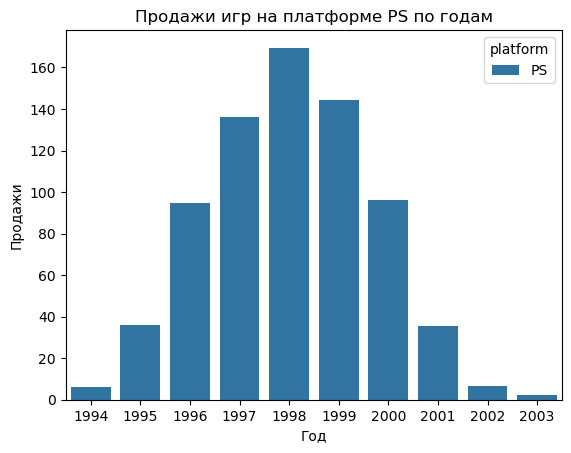

In [17]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='PS'])
bp.set_title('Продажи игр на платформе PS по годам')
bp.set(xlabel='Год',ylabel='Продажи');

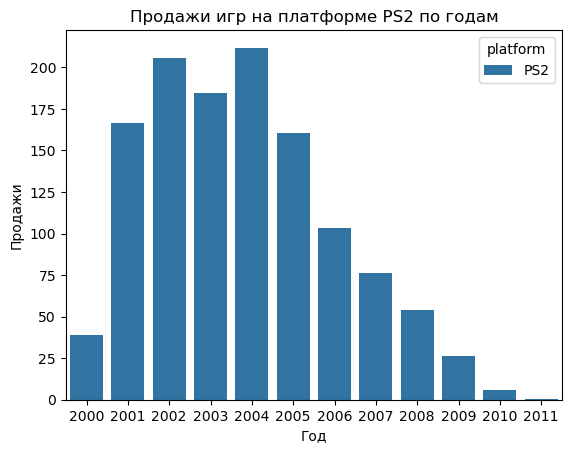

In [18]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='PS2'])
bp.set_title('Продажи игр на платформе PS2 по годам')
bp.set(xlabel='Год',ylabel='Продажи');

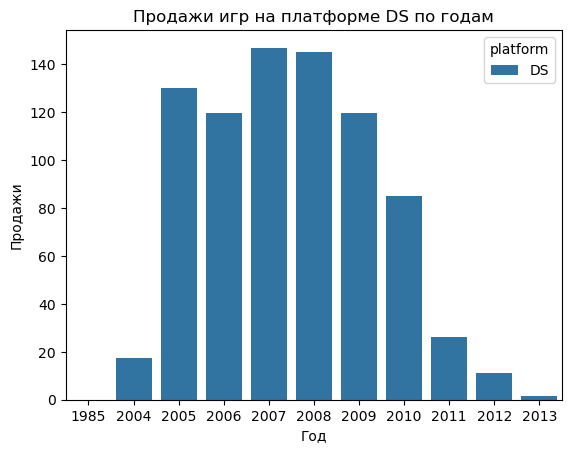

In [19]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='DS'])
bp.set_title('Продажи игр на платформе DS по годам')
bp.set(xlabel='Год',ylabel='Продажи');

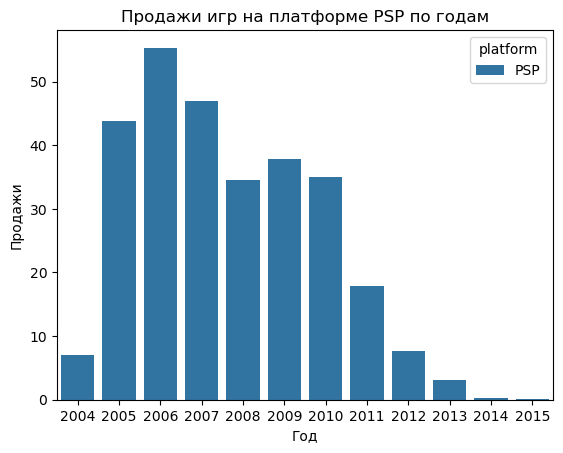

In [20]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='PSP'])
bp.set_title('Продажи игр на платформе PSP по годам')
bp.set(xlabel='Год',ylabel='Продажи');

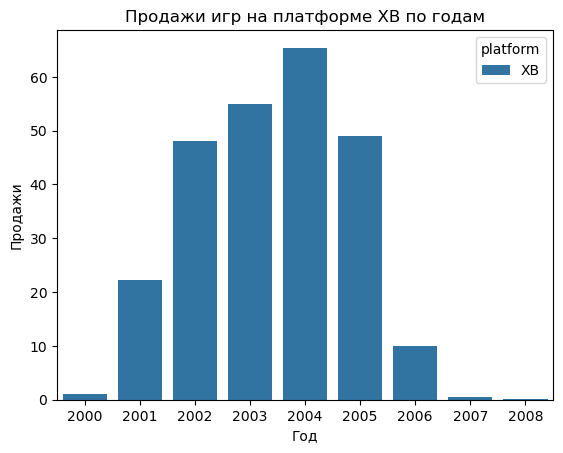

In [21]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='XB'])
bp.set_title('Продажи игр на платформе XB по годам')
bp.set(xlabel='Год',ylabel='Продажи');

 Итак мы видим что в среднем платформа живет 9-10 лет. При этом высокие продажи на популярной платформе держатся в течение примерно 5-6 лет. Активность на новой платформе, высокая сразу после появления (самый первый год на графиках не учитываем - потому что это не полный год), а на 7-й год значительно ниже пиковой (меньше половины).
 
 
 Выводы: 
  - Рынок компьютерных игр значительно вырос в 1994 и, затем, 2001-2002 годах. Все что происходило до 2001 года можно считать периодом становления.
  - Все актуальные на конец 2016 года платформы (за исключением PC) появились не ранее 2006 года. 
  - Для дальнейшего исследования возьмем данные начиная 2014 года (т.е. за последние 3 года), т.к. рынок компьютерных игр бурно развивается, а многие из платформ представленных в датасете прекратили свою деятельность к 2016 году.

In [22]:
games = games.loc[games['year_of_release']>=2014]


platforms = games.pivot_table(
            index=['platform','year_of_release'],\
            values=['sum_sales'],\
            aggfunc=['sum']\
).reset_index()
platforms.columns=['platform','year_of_release','sum_sales']

games.groupby(['platform']).agg(
    count=('year_of_release','count'),
    sum_sales=('sum_sales','sum'),
    min_year=('year_of_release','min'),
    max_year=('year_of_release','max')).sort_values('max_year')

,count,sum_sales,min_year,max_year
platform,,,,
PSP,13,0.36,2014,2015
3DS,212,86.68,2014,2016
PC,151,27.05,2014,2016
PS3,219,68.18,2014,2016
PS4,376,288.15,2014,2016
PSV,295,22.40,2014,2016
Wii,11,5.07,2014,2016
WiiU,73,42.98,2014,2016
X360,111,48.22,2014,2016


### Популярность актуальных платформ
  
  Рассмотрим платформу PC - она не типичная, т.к. не является чисто игровой. Поэтому её активность кратно дольше остальных и может иметь несколько пиков, которые могут повторяться в будущем:

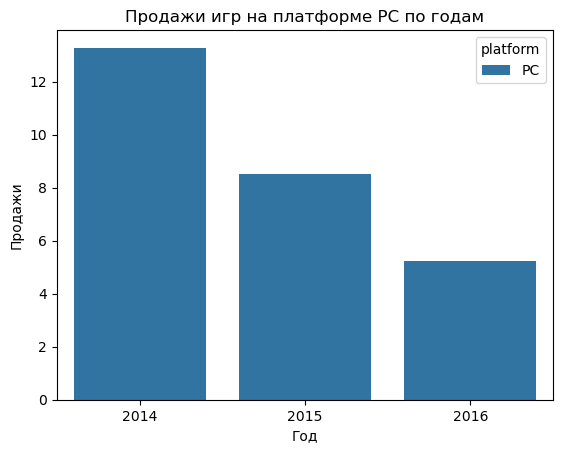

In [23]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='PC'])
bp.set_title('Продажи игр на платформе PC по годам')
bp.set(xlabel='Год',ylabel='Продажи');

Платформы актуальные на 2016 год:

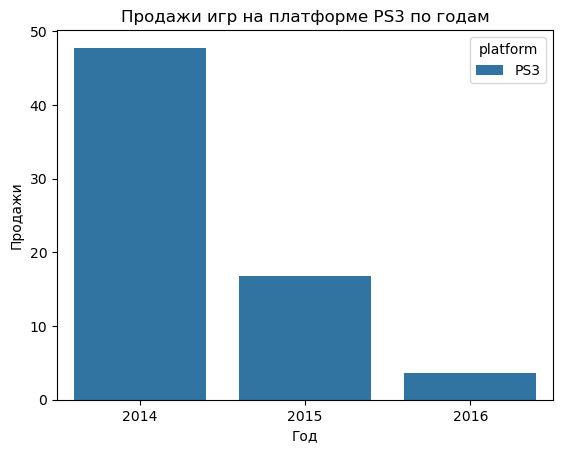

In [24]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='PS3'])
bp.set_title('Продажи игр на платформе PS3 по годам')
bp.set(xlabel='Год',ylabel='Продажи');

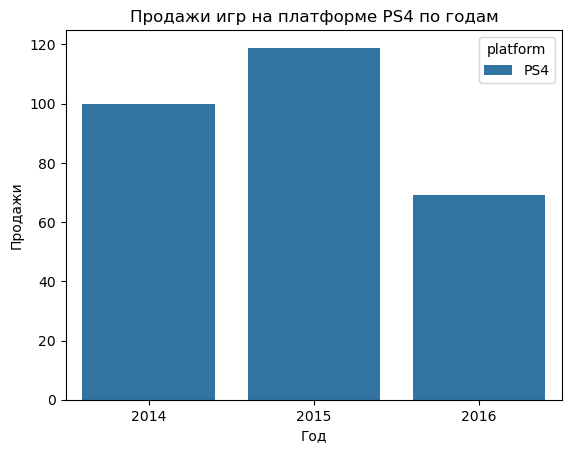

In [25]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='PS4'])
bp.set_title('Продажи игр на платформе PS4 по годам')
bp.set(xlabel='Год',ylabel='Продажи');

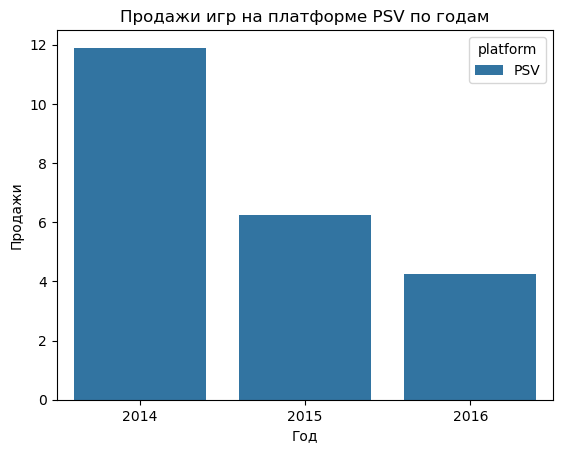

In [26]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='PSV'])
bp.set_title('Продажи игр на платформе PSV по годам')
bp.set(xlabel='Год',ylabel='Продажи');

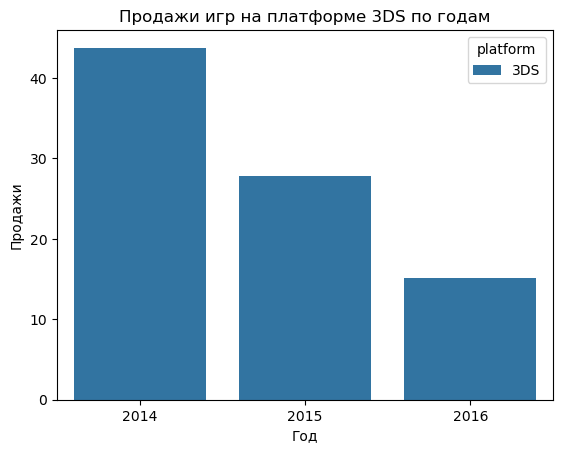

In [27]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='3DS'])
bp.set_title('Продажи игр на платформе 3DS по годам')
bp.set(xlabel='Год',ylabel='Продажи');

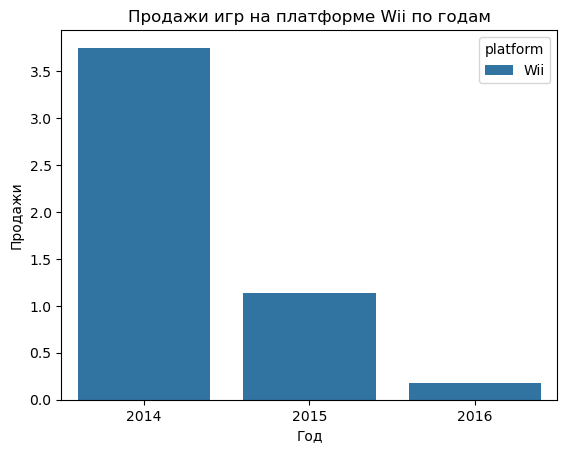

In [28]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='Wii'])
bp.set_title('Продажи игр на платформе Wii по годам')
bp.set(xlabel='Год',ylabel='Продажи');

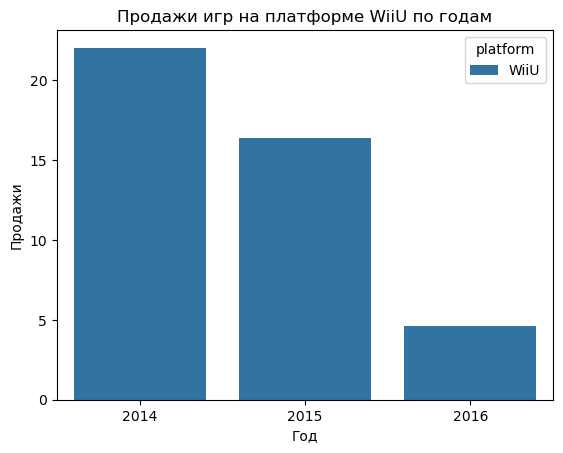

In [29]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='WiiU'])
bp.set_title('Продажи игр на платформе WiiU по годам')
bp.set(xlabel='Год',ylabel='Продажи');

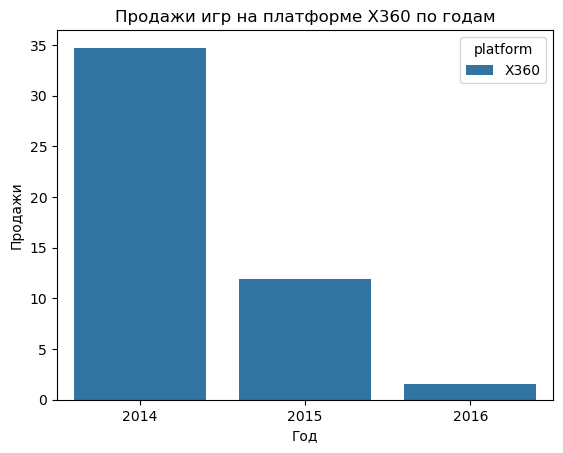

In [30]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='X360'])
bp.set_title('Продажи игр на платформе X360 по годам')
bp.set(xlabel='Год',ylabel='Продажи');

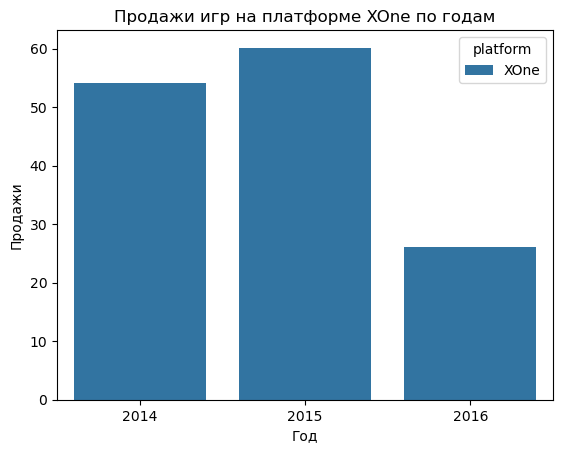

In [31]:
bp = sns.barplot(x='year_of_release',
                y='sum_sales',
                hue='platform',
                data=platforms.loc[platforms['platform']=='XOne'])
bp.set_title('Продажи игр на платформе XOne по годам')
bp.set(xlabel='Год',ylabel='Продажи');

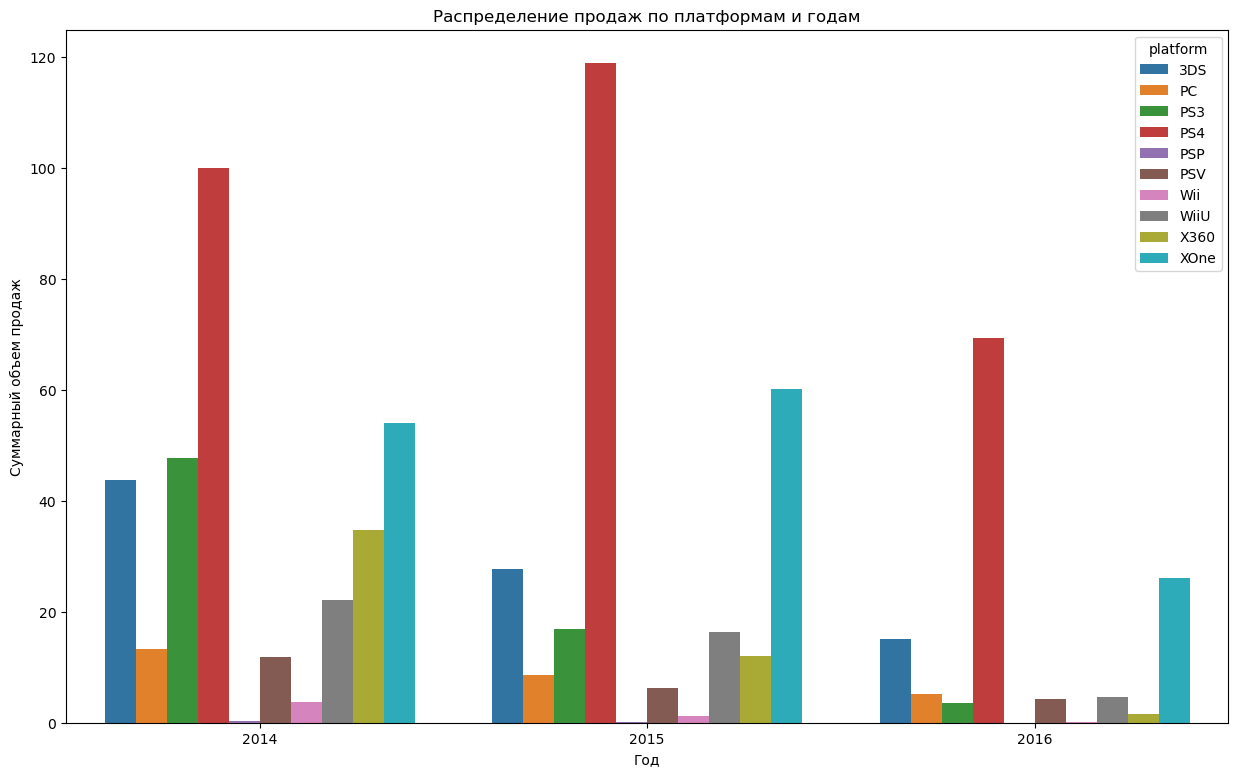

In [32]:
fig, ax = plt.subplots(figsize=(15, 9))

ax = sns.barplot(x='year_of_release',
            y='sum_sales',
            hue="platform",
            data=platforms)

ax.set_title('Распределение продаж по платформам и годам')
ax.set(xlabel='Год', ylabel='Суммарный объем продаж');

  Наиболее популярные (и находящиеся в середине "жизненного цикла") платформы: PS4 (самая популярная) и XOne. 
  
  3DS и PSV - менее популярны, а главное уже в 2016 находятся на спаде популярности.
   
  PC - не типичная платформа с не очень большой популярностью, но ей не грозит резкий спад в связи с её универсальностью.
   

### Продажи в разрезе платформ

Разброс суммарной выручки по платформам:

  platform  sum_sales  mean_sales  median_sales  count
3      PS4     288.15    0.766356         0.185    376
9     XOne     140.36    0.615614         0.205    228
0      3DS      86.68    0.408868         0.090    212
2      PS3      68.18    0.311324         0.110    219
8     X360      48.22    0.434414         0.180    111
7     WiiU      42.98    0.588767         0.190     73
1       PC      27.05    0.179139         0.060    151
5      PSV      22.40    0.075932         0.040    295
6      Wii       5.07    0.460909         0.180     11
4      PSP       0.36    0.027692         0.020     13


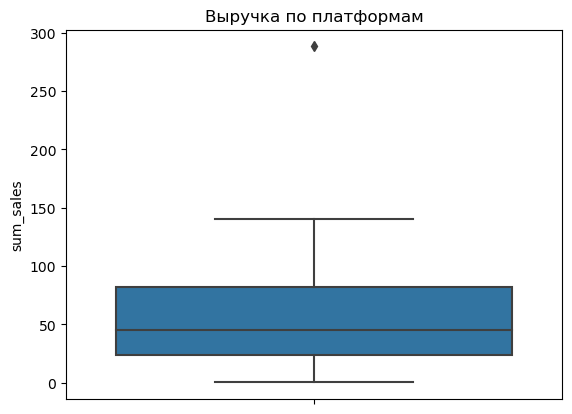

In [33]:
import matplotlib.pyplot as plt

platform_sales = games.pivot_table(
            index=['platform'],\
            values=['sum_sales'],\
            aggfunc=['sum','mean','median','count']\
).reset_index()
platform_sales.columns=['platform','sum_sales','mean_sales','median_sales','count']
platform_sales.sort_values('sum_sales',ascending=False,inplace=True)
print(platform_sales.head(20))

sns.boxplot(y=platform_sales.sum_sales)
plt.title('Выручка по платформам')
plt.show()

  Для половины платформ суммарная выручка за все годы во всех регионах не превышает ~ 300 млн. долл. Однако для отдельных платформ выручка доходит до 1200 млн.$
 
  Для большинства платформ средняя выручка с одной игры кратно превышает медианную - рассмотрим разброс выручки от продаж одной игры на каждой платформе:

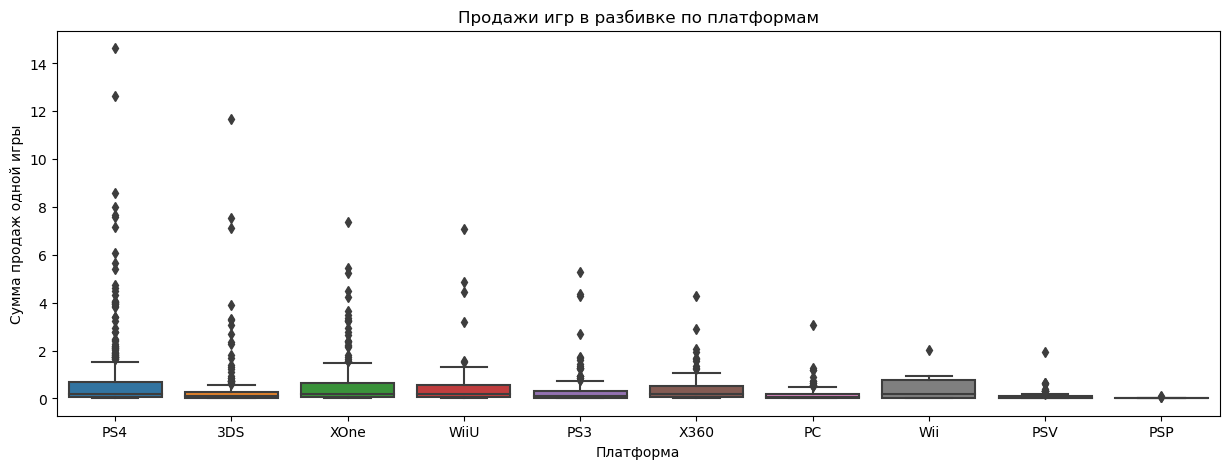

In [37]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=games.platform, y=games.sum_sales)
ax.set(xlabel='Платформа', ylabel='Сумма продаж одной игры')
ax.set_title('Продажи игр в разбивке по платформам');

Медианные значения продаж очень маленькие (по сравнению c продажами "хитов") для всех платформ. Межквартильный размах для разных платформ существенно различается, однако самый большой вклад в среднюю и суммарную выручку наиболее крупных платформ - таких как PS4, 3DS и XOne - дают отдельные выбросы - "хиты", наиболее популярные игры, выручка от которых превышает среднюю и медианную по платформе в десятки раз. 

Посмотрим на медианные значения и межквартильные размахи:

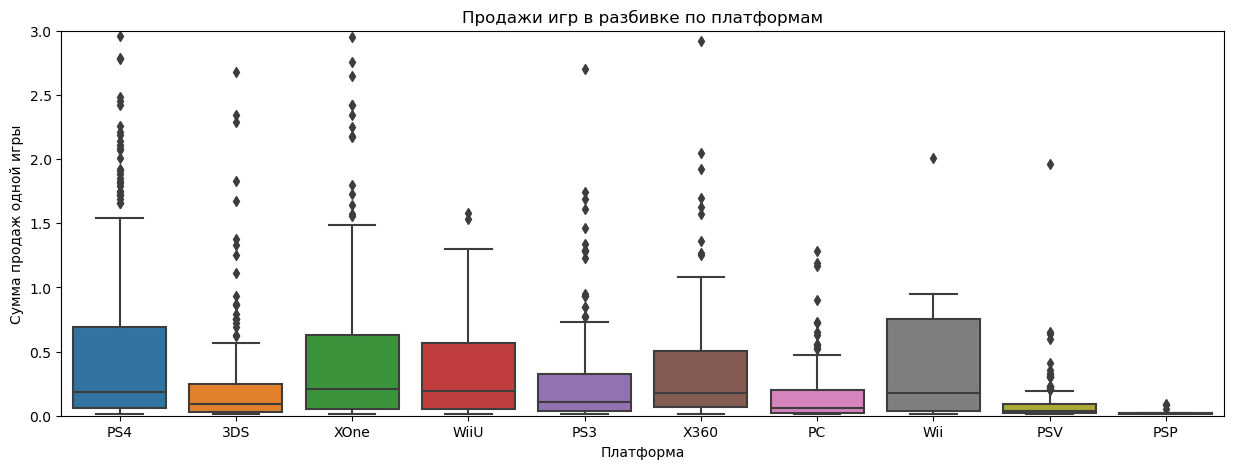

In [38]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'platform', y = 'sum_sales', data = games)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж одной игры')
plt.title('Продажи игр в разбивке по платформам')
plt.ylim(0,3)
plt.show()

### Оценка влияния отзывов критиков и пользователей на продажи

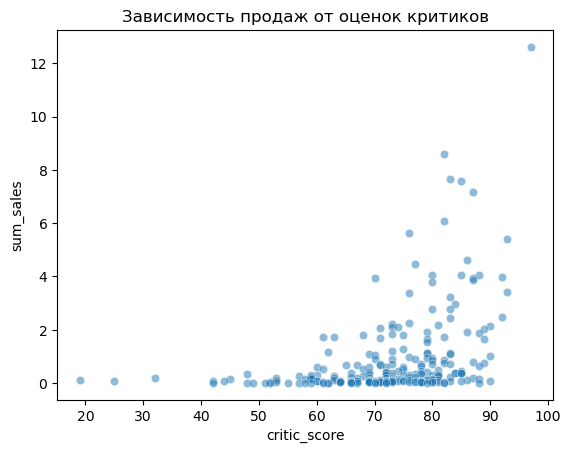

In [45]:
ps4 = games.loc[games['platform']=='PS4']
ps4 = ps4.dropna()
ps4.reset_index(drop=True,inplace=True)

sc_p = sns.scatterplot(x=ps4.critic_score, y=ps4.sum_sales, alpha=0.5)
sc_p.set_title('Зависимость продаж от оценок критиков');

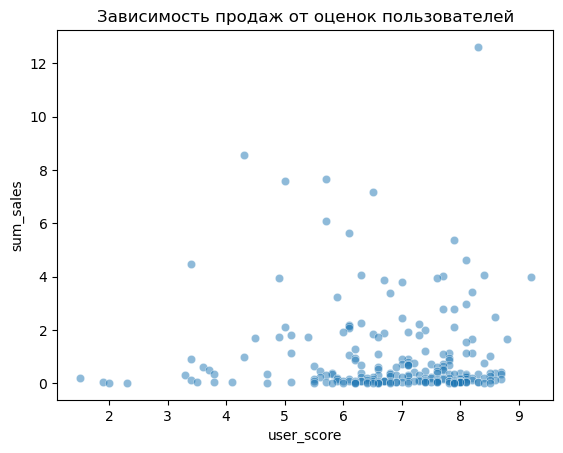

In [47]:
sc_p = sns.scatterplot(x=ps4.user_score, y=ps4.sum_sales, alpha=0.5);
sc_p.set_title('Зависимость продаж от оценок пользователей');

In [39]:
print('PS4')
print('Коэффициент корреляции оценок критиков с продажами:',round(ps4['sum_sales'].corr(ps4['critic_score']),3))
print('Коэффициент корреляции оценок пользователей с продажами:',round(ps4['sum_sales'].corr(ps4['user_score']),3))

PS4
Коэффициент корреляции оценок критиков с продажами: 0.401
Коэффициент корреляции оценок пользователей с продажами: -0.042


In [40]:
XOne = games.loc[games['platform']=='XOne']
XOne = XOne.dropna()
XOne.reset_index(drop=True,inplace=True)
print('XOne')
print('Коэффициент корреляции оценок критиков с продажами:',round(XOne['sum_sales'].corr(XOne['critic_score']),3))
print('Коэффициент корреляции оценок пользователей с продажами:',round(XOne['sum_sales'].corr(XOne['user_score']),3))

XOne
Коэффициент корреляции оценок критиков с продажами: 0.421
Коэффициент корреляции оценок пользователей с продажами: -0.074


In [41]:
DS3 = games.loc[games['platform']=='3DS']
DS3 = DS3.dropna()
DS3.reset_index(drop=True,inplace=True)
print('3DS')
print('Коэффициент корреляции оценок критиков с продажами:',round(DS3['sum_sales'].corr(DS3['critic_score']),3))
print('Коэффициент корреляции оценок пользователей с продажами:',round(DS3['sum_sales'].corr(DS3['user_score']),3))

3DS
Коэффициент корреляции оценок критиков с продажами: 0.285
Коэффициент корреляции оценок пользователей с продажами: 0.28


In [42]:
PS3 = games.loc[games['platform']=='PS3']
PS3 = PS3.dropna()
PS3.reset_index(drop=True,inplace=True)
print('3DS')
print('Коэффициент корреляции оценок критиков с продажами:',round(PS3['sum_sales'].corr(PS3['critic_score']),3))
print('Коэффициент корреляции оценок пользователей с продажами:',round(PS3['sum_sales'].corr(PS3['user_score']),3))

3DS
Коэффициент корреляции оценок критиков с продажами: 0.447
Коэффициент корреляции оценок пользователей с продажами: 0.157


**Вывод:** на примере трех платформ мы видим, что продажи коррелируют с оценками критиков, но почти не коррелируют с оценками пользователей.

### Популярность и влияние жанров на продажи

Жанры по суммарной выручке:

In [43]:
genres = games.groupby(['genre']).agg(
    count=('name','count'),
    mean_critic_score=('critic_score','mean'),
    mean_user_score=('user_score','mean'),
    sum_sales=('sum_sales','sum')
).reset_index().sort_values('sum_sales',ascending=False)
genres['mean_sales'] = round(genres['sum_sales']/genres['count'],2)
genres.head(20)

,genre,count,mean_critic_score,mean_user_score,sum_sales,mean_sales
0,Action,619,70.298701,6.760606,199.36,0.32
8,Shooter,128,75.539326,6.549074,170.94,1.34
10,Sports,161,70.214286,5.225197,109.48,0.68
7,Role-Playing,221,74.525773,7.348571,101.44,0.46
3,Misc,113,73.606061,6.968293,37.55,0.33
2,Fighting,60,70.419355,6.983784,28.22,0.47
6,Racing,69,71.702128,6.327451,27.52,0.40
4,Platform,38,76.296296,6.741379,18.09,0.48
1,Adventure,185,72.714286,7.470213,17.55,0.09
9,Simulation,44,69.500000,6.504167,13.13,0.30


Жанры по выручке на одну игру:

In [44]:
genres.sort_values('mean_sales',ascending=False)

,genre,count,mean_critic_score,mean_user_score,sum_sales,mean_sales
8,Shooter,128,75.539326,6.549074,170.94,1.34
10,Sports,161,70.214286,5.225197,109.48,0.68
4,Platform,38,76.296296,6.741379,18.09,0.48
2,Fighting,60,70.419355,6.983784,28.22,0.47
7,Role-Playing,221,74.525773,7.348571,101.44,0.46
6,Racing,69,71.702128,6.327451,27.52,0.40
3,Misc,113,73.606061,6.968293,37.55,0.33
0,Action,619,70.298701,6.760606,199.36,0.32
9,Simulation,44,69.500000,6.504167,13.13,0.30
5,Puzzle,14,77.250000,7.975000,2.21,0.16


  Самый популярный жанр - Action (по выручке). В пятерку самых популярных так же входят жанры Shooter, Sports, Role-Playing, Misc. 
 
  При этом, важно отметить, что по объему продаж на одну игру лидируют Shooter, Sports, Platform, Fighting, Role-Playing тогда как наиболее популярный жанр Action по этому показателю - средний. 
  
  Наименее популярные жанры (по всем показателям) - Puzzle, Strategy, Adventure, Simulation. 

## Портрет пользователя по регионам

Суммарные продажи по регионам:

In [45]:
games[['na_sales','eu_sales','jp_sales']].sum()

na_sales    284.06
eu_sales    270.68
jp_sales     93.09
dtype: float64

### Самые популярные платформы по регионам

Рассмотрим наиболее популярные платформы:

In [46]:
platforms_regions = games.groupby(['platform']).agg(
    na_sales=('na_sales','sum'),
    eu_sales=('eu_sales','sum'),
    jp_sales=('jp_sales','sum')
).reset_index()

print(platforms_regions[['platform','na_sales']].sort_values('na_sales',ascending=False).head(20))

  platform  na_sales
3      PS4     98.61
9     XOne     81.27
8     X360     28.30
0      3DS     22.64
2      PS3     22.05
7     WiiU     19.36
1       PC      7.23
5      PSV      2.52
6      Wii      2.08
4      PSP      0.00


Самые популярные платформы в Северной Америке (в порядке убывания популярности): PS4, XOne, X360, 3DS, PS3

In [47]:
print(platforms_regions[['platform','eu_sales']].sort_values('eu_sales',ascending=False).head(20))

  platform  eu_sales
3      PS4    130.04
9     XOne     46.25
2      PS3     25.54
1       PC     17.97
0      3DS     16.12
8     X360     15.49
7     WiiU     13.15
5      PSV      3.53
6      Wii      2.59
4      PSP      0.00


Самые популярные платформы в Европе (в порядке убывания популярности): PS4, XOne, PS3, PC, 3DS

In [48]:
print(platforms_regions[['platform','jp_sales']].sort_values('jp_sales',ascending=False).head(20))

  platform  jp_sales
0      3DS     44.24
3      PS4     15.02
5      PSV     14.54
2      PS3     11.22
7     WiiU      7.31
4      PSP      0.36
9     XOne      0.32
8     X360      0.08
1       PC      0.00
6      Wii      0.00


  Самые популярные платформы в Японии (в порядке убывания популярности): 3DS, PS4, PSV, PS3, WiiU
    
  Рынок Северной Америки - самый большой, а Японии - самый маленький, среди трех рассматриваемых регионов.
   
  Интересно, что если рейтинги популярности платформ в Северной Америке и Европе более-менее похожи, то японский рейтинг сильно отличается: на первое место попала платформа 3DS вместо PS4, а так же наличием в топ 5 платформ PSV и WiiU. 

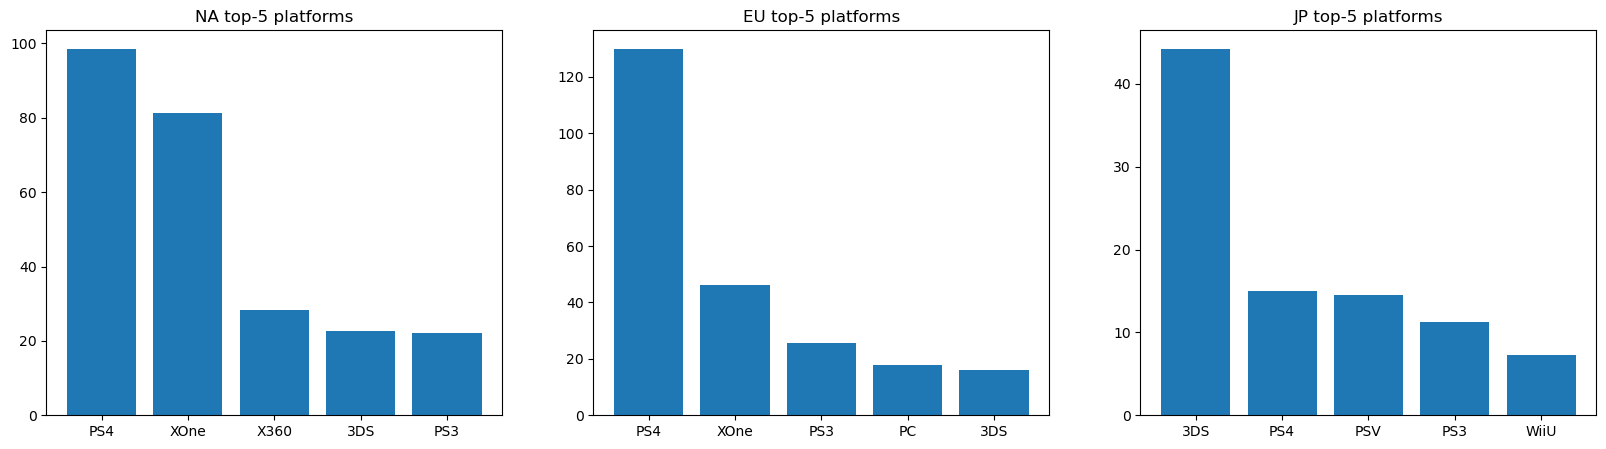

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

na_platform = games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()
eu_platform = games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()
jp_platform = games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()

ax[0].bar(x = na_platform.index, height = na_platform)
ax[0].set_title('NA top-5 platforms')

ax[1].bar(x = eu_platform.index, height = eu_platform)
ax[1].set_title('EU top-5 platforms')

ax[2].bar(x = jp_platform.index, height = jp_platform)
ax[2].set_title('JP top-5 platforms')

plt.show()

### Жанровые предпочтения в разных регионах

In [50]:
genre_regions = games.groupby(['genre']).agg(
    na_sales=('na_sales','sum'),
    eu_sales=('eu_sales','sum'),
    jp_sales=('jp_sales','sum')
).reset_index()

In [51]:
print(genre_regions[['genre','na_sales']].sort_values('na_sales',ascending=False).head(5))

           genre  na_sales
8        Shooter     79.02
0         Action     72.53
10        Sports     46.13
7   Role-Playing     33.47
3           Misc     15.05


В Северной Америке наиболее популярные жанры (по убыванию):  Shooter, Action, Sports, Role-Playing, Misc

In [52]:
print(genre_regions[['genre','eu_sales']].sort_values('eu_sales',ascending=False).head(5))

           genre  eu_sales
0         Action     74.68
8        Shooter     65.52
10        Sports     45.73
7   Role-Playing     28.17
6         Racing     14.13


В Европе рейтинг жанров почти идентичен (по убыванию): Action, Shooter, Sports, Role-Playing, Racing

In [53]:
print(genre_regions[['genre','jp_sales']].sort_values('jp_sales',ascending=False).head(5))

          genre  jp_sales
7  Role-Playing     31.16
0        Action     29.58
2      Fighting      6.37
3          Misc      5.61
8       Shooter      4.87


Японский рейтинг жанров радикально отличается от европейского и американского: Role-Playing, Action, Fighting, Misc, Shooter - на первое место вышел жанр Role-Playing.

 ### Влияние рейтинга ESRB на продажи в отдельных регионах

In [54]:
games['rating'].fillna('without_rating',inplace=True)
games['rating'].isna().sum()



0

In [55]:

rating_regions = games.groupby(['rating']).agg(
    na_sales=('na_sales','sum'),
    eu_sales=('eu_sales','sum'),
    jp_sales=('jp_sales','sum')
).reset_index()


In [56]:
print(rating_regions[['rating','na_sales']].sort_values('na_sales',ascending=False).head(20))

           rating  na_sales
2               M     96.42
4  without_rating     64.72
0               E     50.74
3               T     38.95
1            E10+     33.23


In [57]:
print(rating_regions[['rating','eu_sales']].sort_values('eu_sales',ascending=False).head(20))

           rating  eu_sales
2               M     93.44
4  without_rating     58.95
0               E     58.06
3               T     34.07
1            E10+     26.16


In [58]:
print(rating_regions[['rating','jp_sales']].sort_values('jp_sales',ascending=False).head(20))

           rating  jp_sales
4  without_rating     56.90
3               T     14.78
0               E      8.94
2               M      8.01
1            E10+      4.46


В Северной Америке и Европе распределение популярности игр по рейтингам одинаково. Япония же и по этому параметру так же сильно отличается от остальных рынков: первое место занимют игры без рейтинга, среди игр с рейтингом наиболее популярны игры "T" - для тинейджеров.

## Сравнение пользовательских рейтингов

### Сравнение пользовательских рейтингов платформ XBox One и PC

In [52]:
games = games.dropna(subset=['user_score'])
games.reset_index(drop=True,inplace=True)

  Нулевая гипотеза H0: Средний пользовательский рейтинг игр на платформе XBox One равен среднему пользовательскому рейтингу игр на платформе PC.
 
  Альтернативная гипотеза H1: Средние пользовательские рейтинги игр на платформах XBox One и PC различаются.

In [53]:
results = st.ttest_ind(games[games['platform'] =='XOne']['user_score'],games[games['platform'] =='PC']['user_score'],equal_var=False)
# Уровень значимости
alpha = 0.05
# p-value
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Таким образом мы можем утверждать что средние пользовательские рейтинги на этих плотформах различаются.

### Средние пользовательские рейтинги жанров Action и Sports

Нулевая гипотеза H0: Средний пользовательский рейтинг игр в жанре Action равен среднему пользовательскому рейтингу игр в жанре Sports.

Альтернативная гипотеза H1: Средние пользовательские рейтинги игр в жанрах Action и Sports различаются.


In [54]:
results = st.ttest_ind(games[games['genre'] =='Action']['user_score'],games[games['genre'] =='Sports']['user_score'],equal_var=False)
# уровень значимости
alpha = 0.05
# p-value
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Таким образом мы можем утверждать что средние пользовательские рейтинги для жанров Action и Sports различаются.
 
*(Комментарий: в задании предлагается проверить не гипотезу о "равенстве средних рейтингнов", а именно о "неравенстве средних рейтингов" - на данный момент я не понял как это делать напрямую и можно ли вообще. Поэтому пошел от обратного - если удастся отвергнуть гипотезу о равенстве, то можно считать это подтверждением гипозы о неравнстве)*

## Общий вывод

1. Количество игр на всех платформах дважды резко возрастало: в 1994-1995 годах и 2001-2002 годах.
2. Обычно срок активной жизни одной платформы составляет около 6 лет, далее начинается спад активности (полный срок жизни платформы 9-10 лет).
3. В 2016 году наиболее популярные (и находящиеся в середине "жизненного цикла") платформы: PS4 (самая популярная) и XOne. 3DS и PS3 - менее популярны, а главное уже в 2016 находятся на спаде популярности.  PC - не типичная платформа с не очень большой популярностью, но ей не грозит резкий спад в связи с её универсальностью.
4. Продажи игр прямо коррелируют с оценками критиков и слабо коррелируют с оценками пользователей.
5. Самая популярная платформа в Северной Америке и Европе - PS4, в Японии - 3DS.
6. В Северной Америке и Европе одинаковые жанровые предпочтения: Action, Shooter, Sports. Жанровые предпочтения пользователей из Японии отличаются от Северной Америки и Европы в пользу жанра Role-Playing, топ 3 Японии: Role-Playing, Action, Fighting.

7. Рекомендации магазину видеоигр: 

 - Рынки Северной Амерки и Европы очень похожи и кратно превосходят рынок Японии. Поэтому имеет смысл ориентироваться именно на них.
 - Соответственно, в первую очередь, имеет смысл рассмотреть платформы PS4 и XOne. Жанры Action, Shooter и Sports. Судя по рейтингу ESRB на этих рынках компьютерные игры популярны у взрослой аудитории - рейтинг M (для взрослых), игры без рейтинга и рейтиг E (для всех).
 
